In [2]:
from graphing import report_graph, get_sim, path_to_output

report_path_to_output = path_to_output + "report/" 

sim = get_sim("../sim_data/sim.pickle")
report_graph(sim)

Simulation not found.


AttributeError: 'NoneType' object has no attribute 'history'

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def get_random_matrix_affinity(parameter):
    """
    Generate entries from an exponential distribution (this mimics the idea of not having most phenotypes bind). But we have renormalised and modified to keep within [0,1]
    """
    w = 1000
    h = 1000
    exp_matrix = np.random.exponential(1 / parameter, (w, h))
    norm_matrix = 1 - (1 / (1 + exp_matrix))
    return norm_matrix

values = [ 2, 4, 6, 8]

for i in range(len(values)):
    value = values[i]
    figure, ax = plt.subplots()
    ax.set_xlim(0,1)
    plt.hist(get_random_matrix_affinity(value).flatten())

This goes through every simulation saved, and generates the correct plots

In [8]:
sim = get_sim("../sim_data/report\sim.pickle_CorHalfRealSequenceBinding10")
sim.time_step

Successfully opened the previous simulation.


600

../sim_data/report\sim.pickle
Successfully opened the previous simulation.
../sim_data/report\sim.pickle_CorHalfRealSequenceBinding0.5
Successfully opened the previous simulation.
../sim_data/report\sim.pickle_CorHalfRealSequenceBinding1
Successfully opened the previous simulation.
../sim_data/report\sim.pickle_CorHalfRealSequenceBinding10
Successfully opened the previous simulation.
../sim_data/report\sim.pickle_UnifBinding1
Successfully opened the previous simulation.


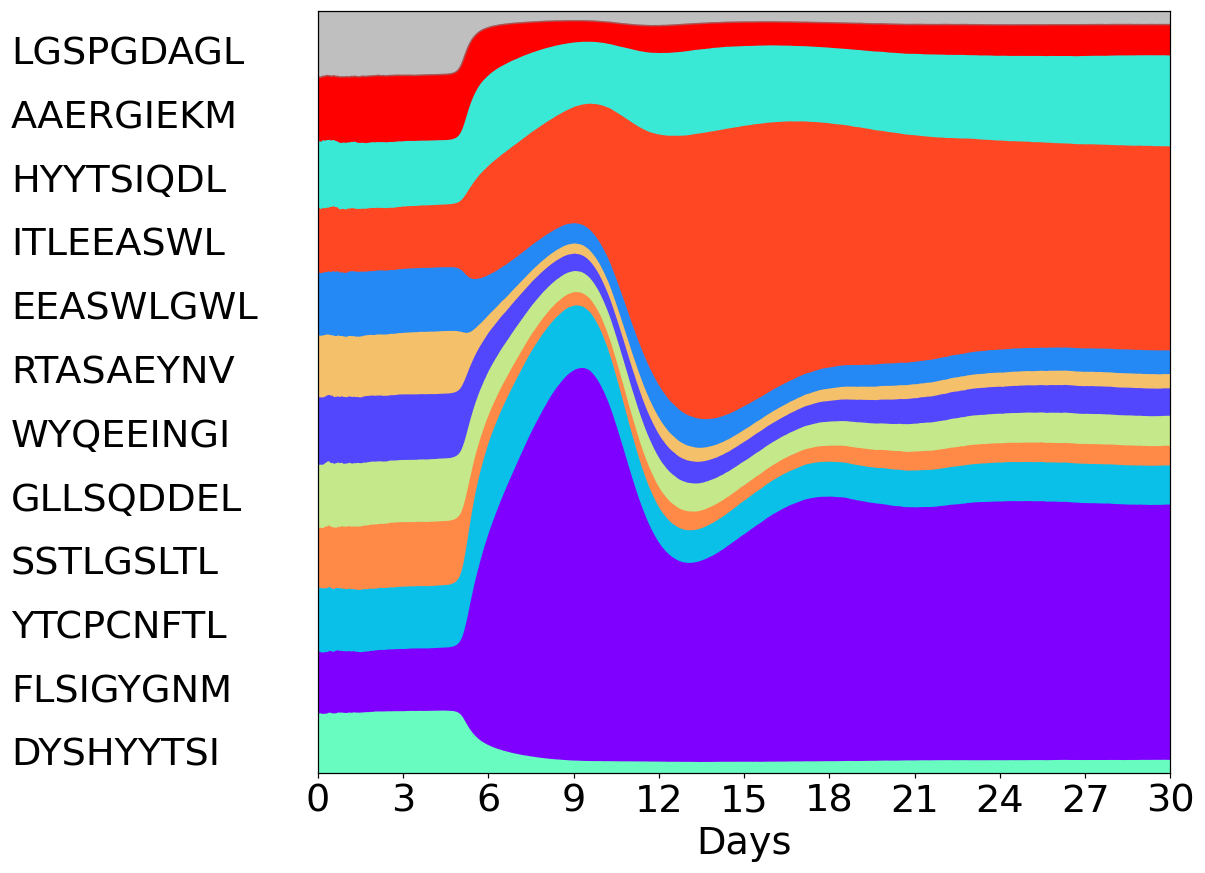

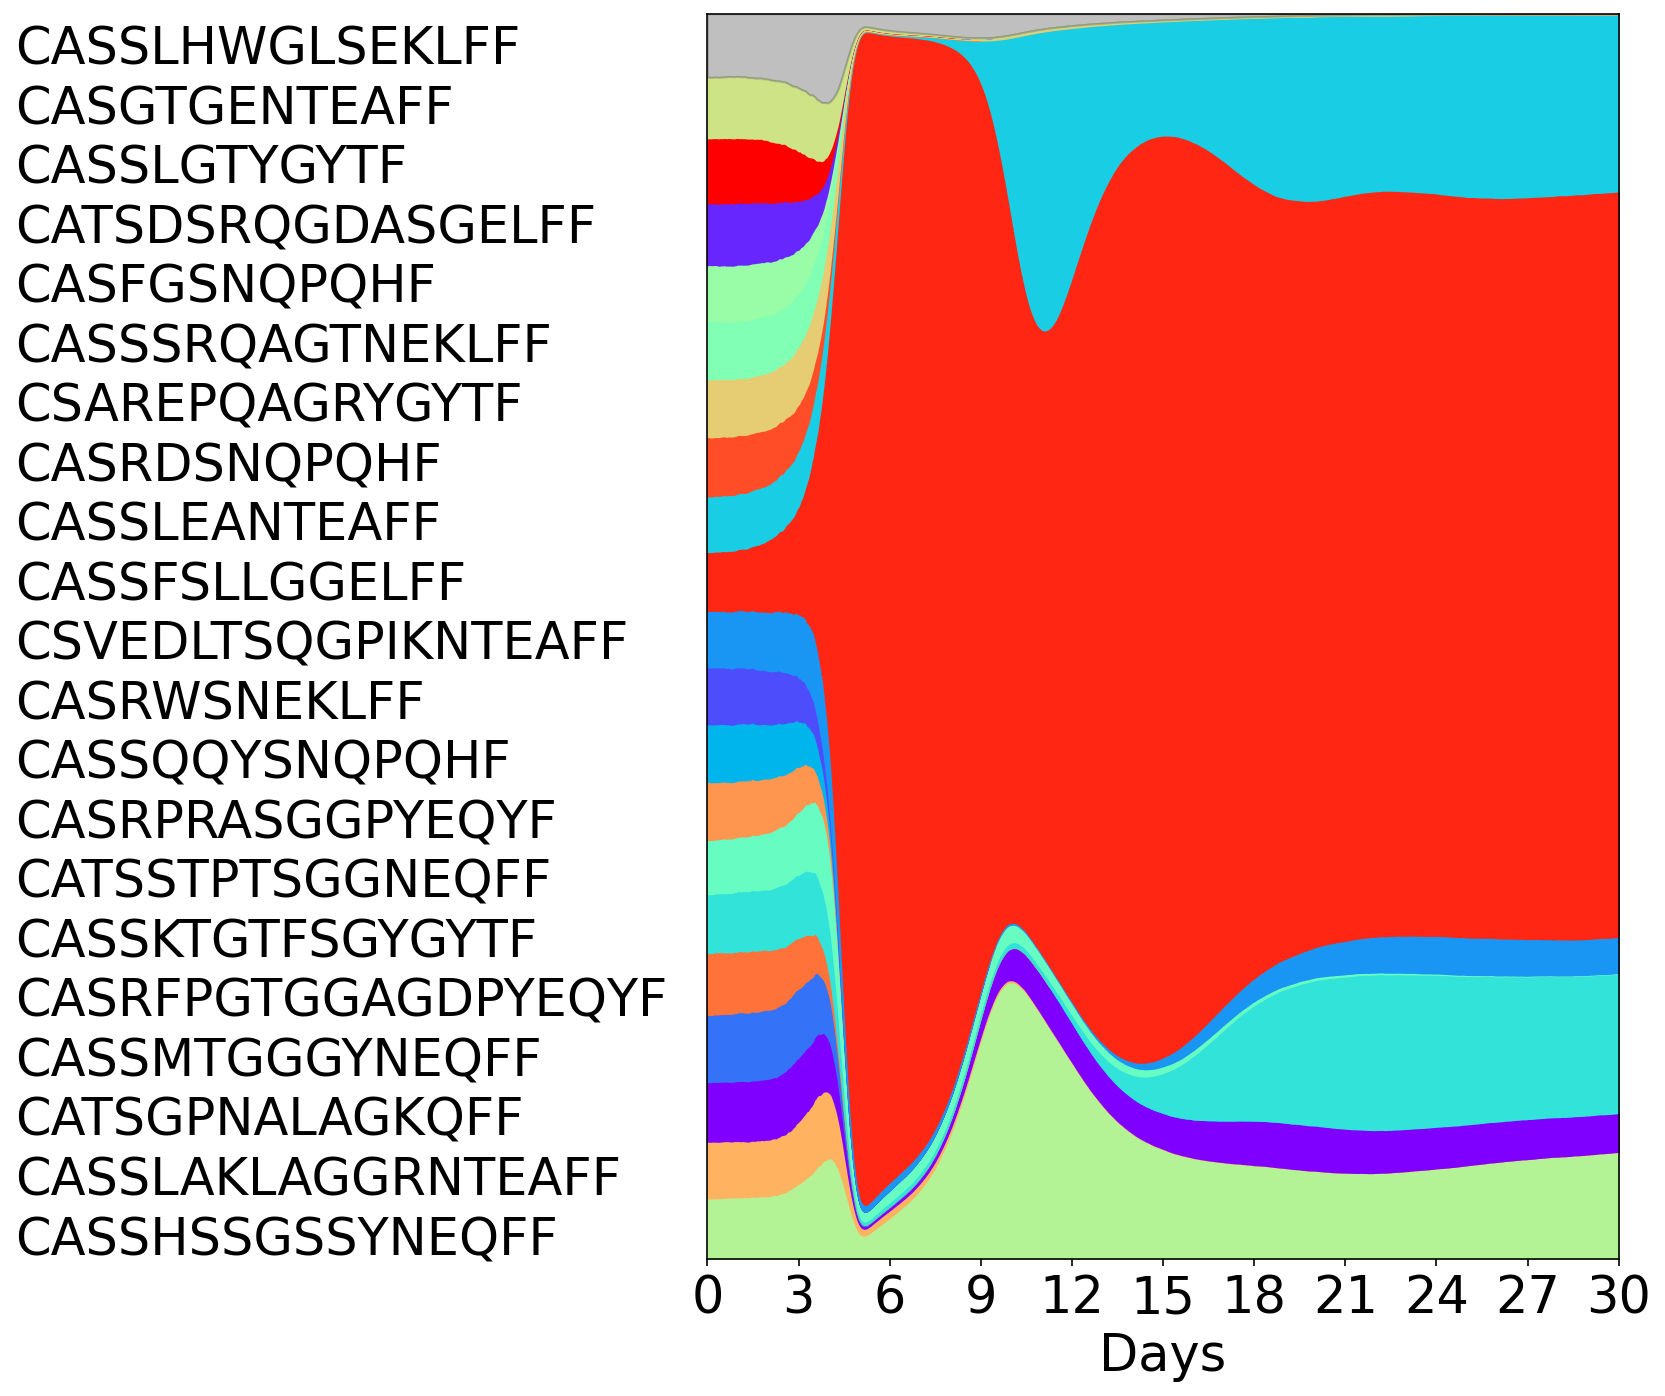

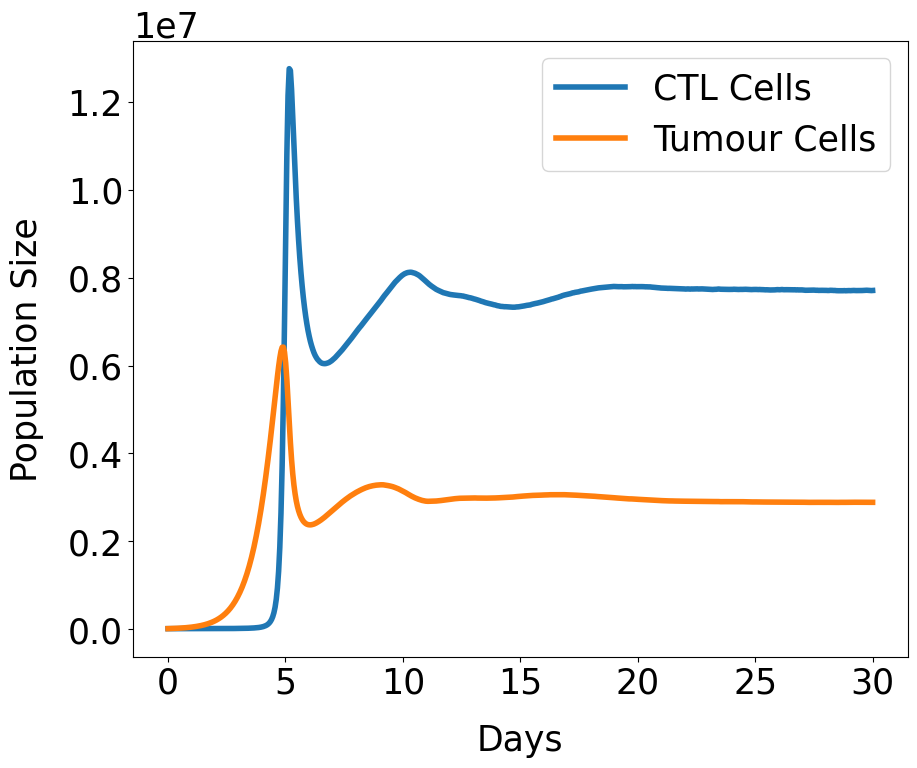

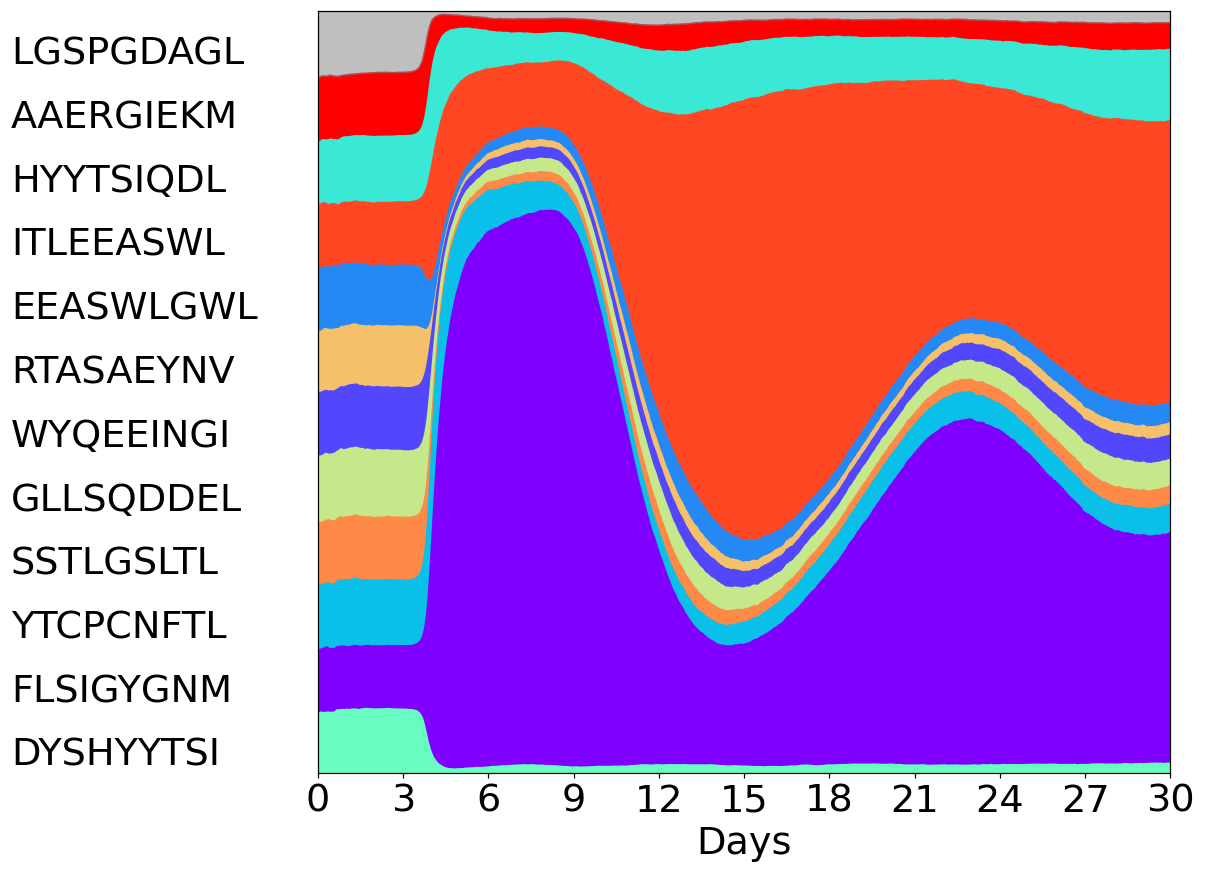

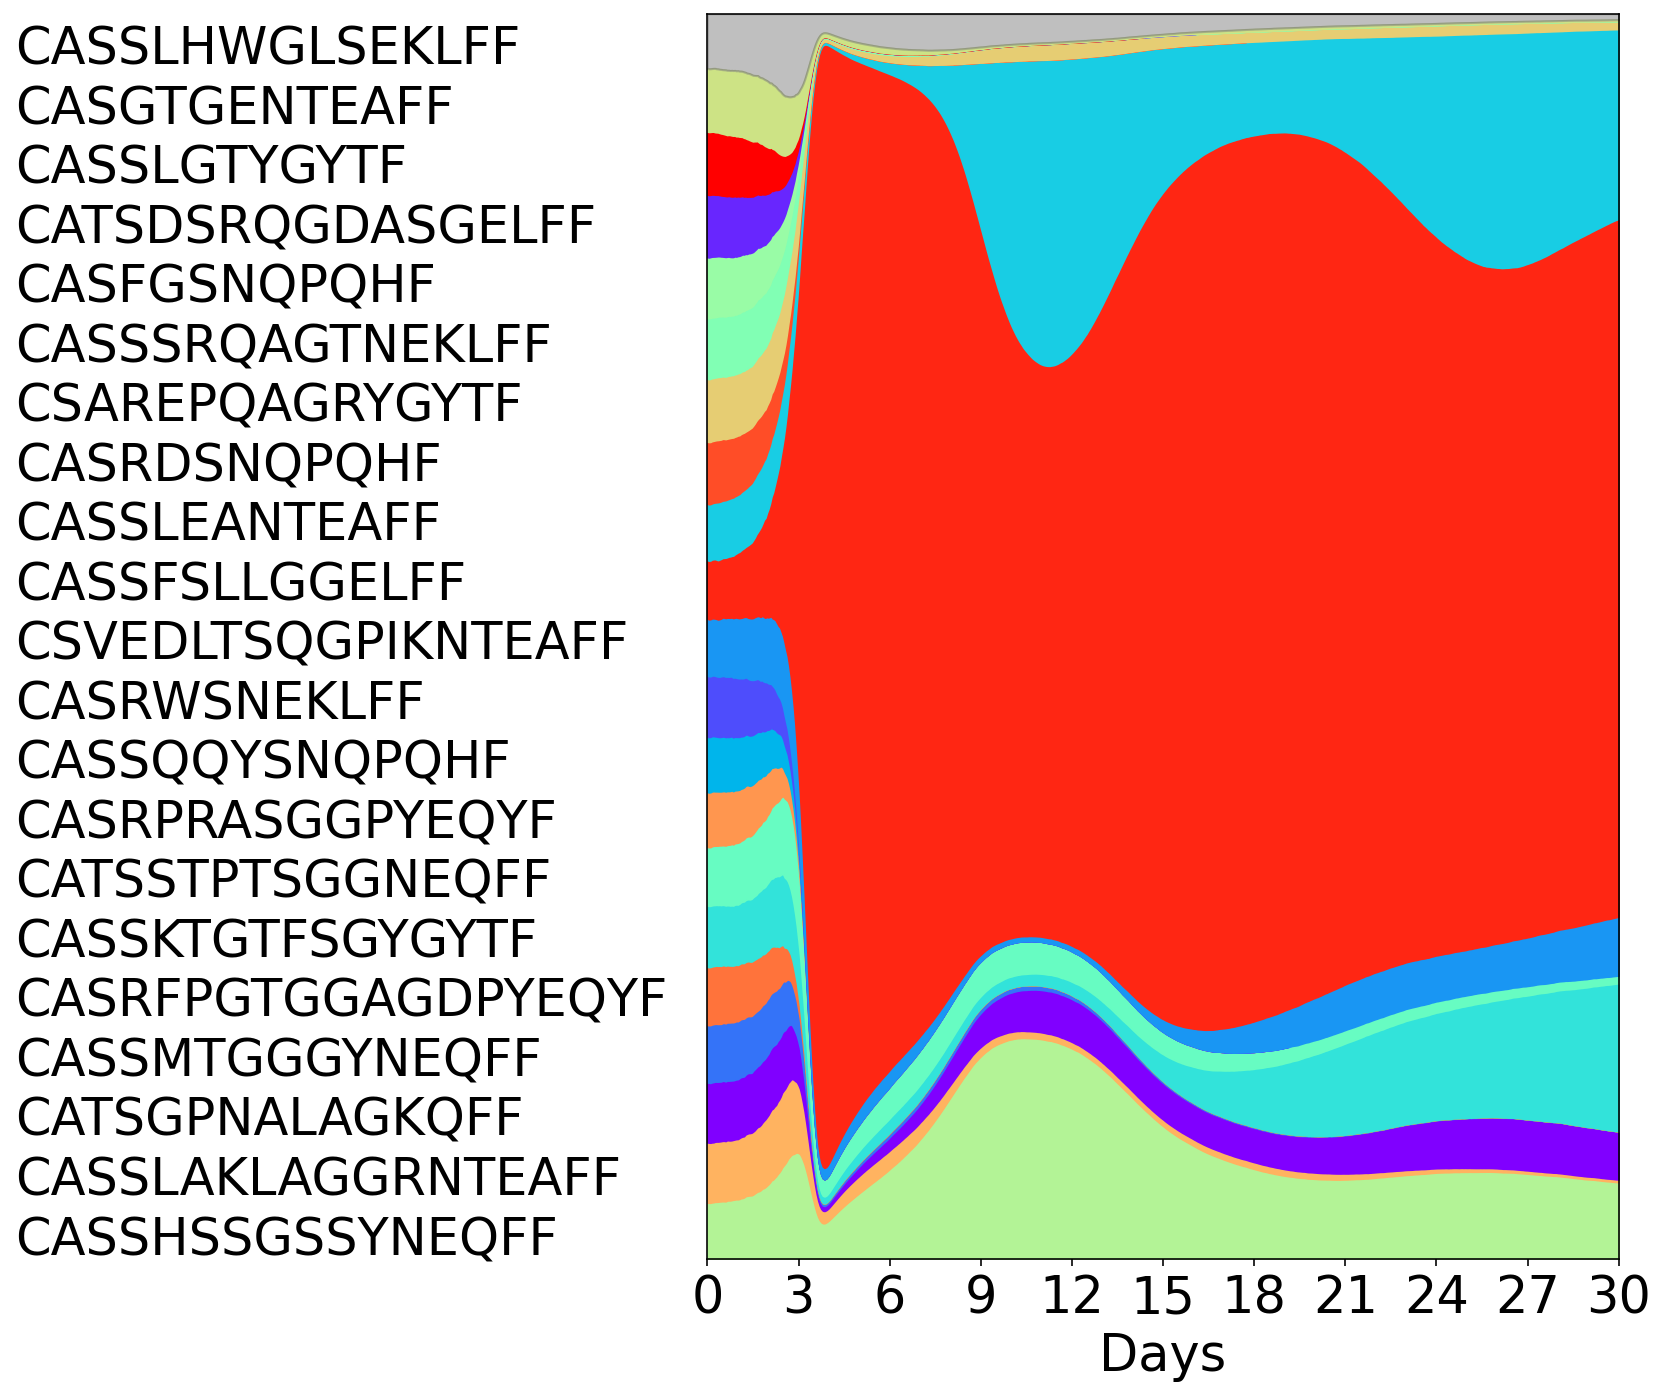

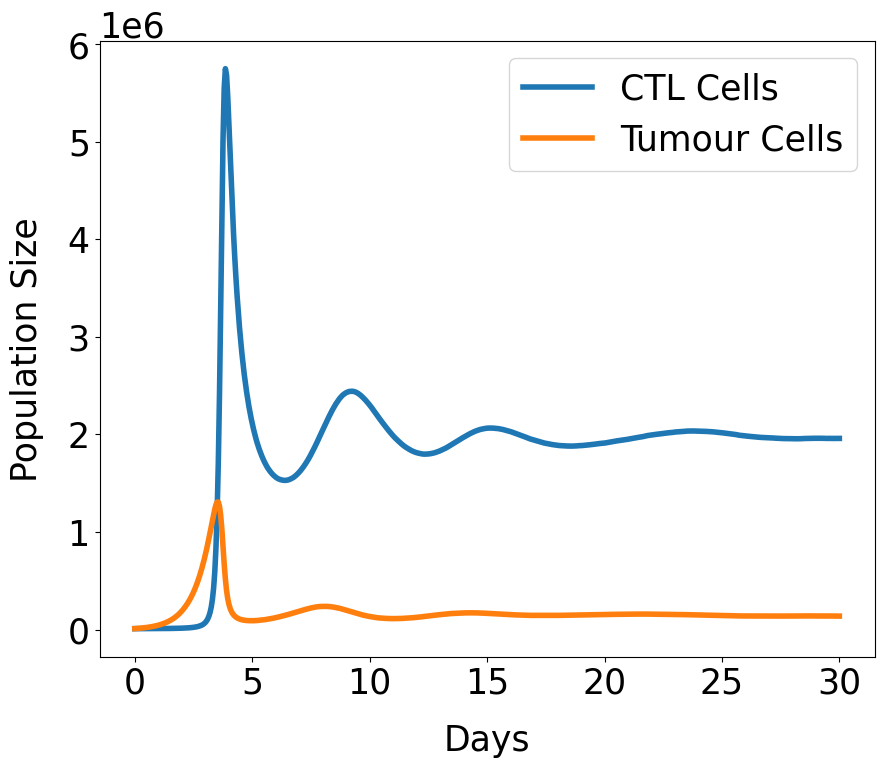

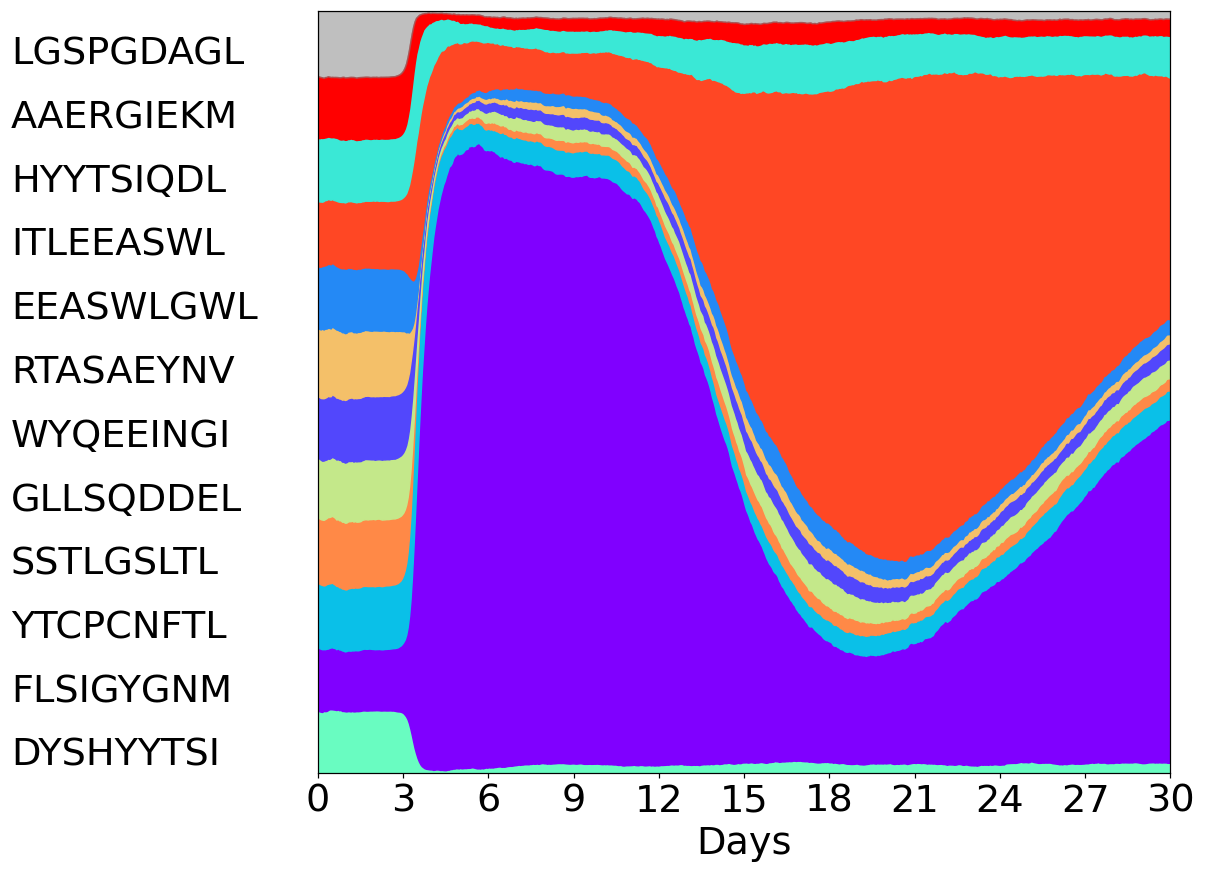

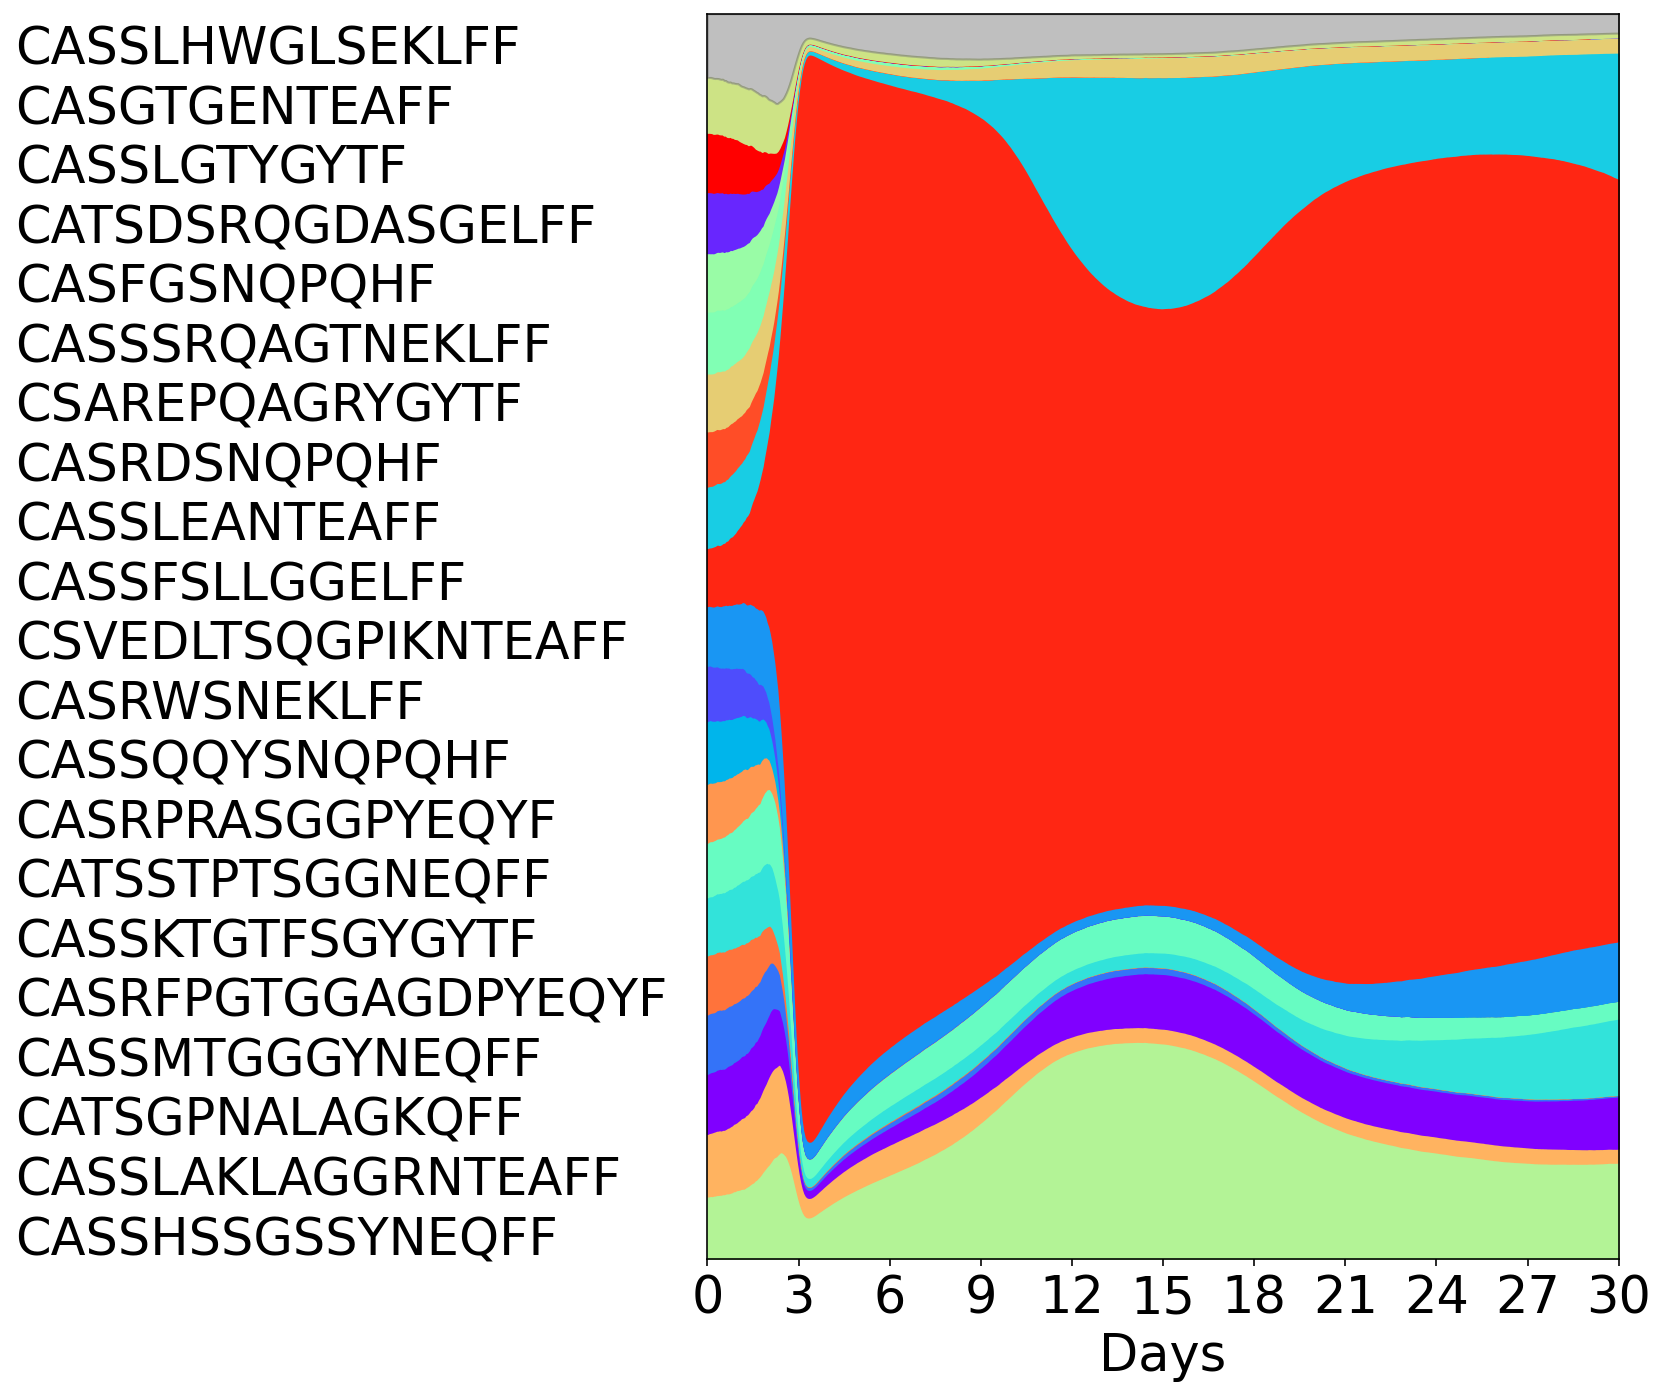

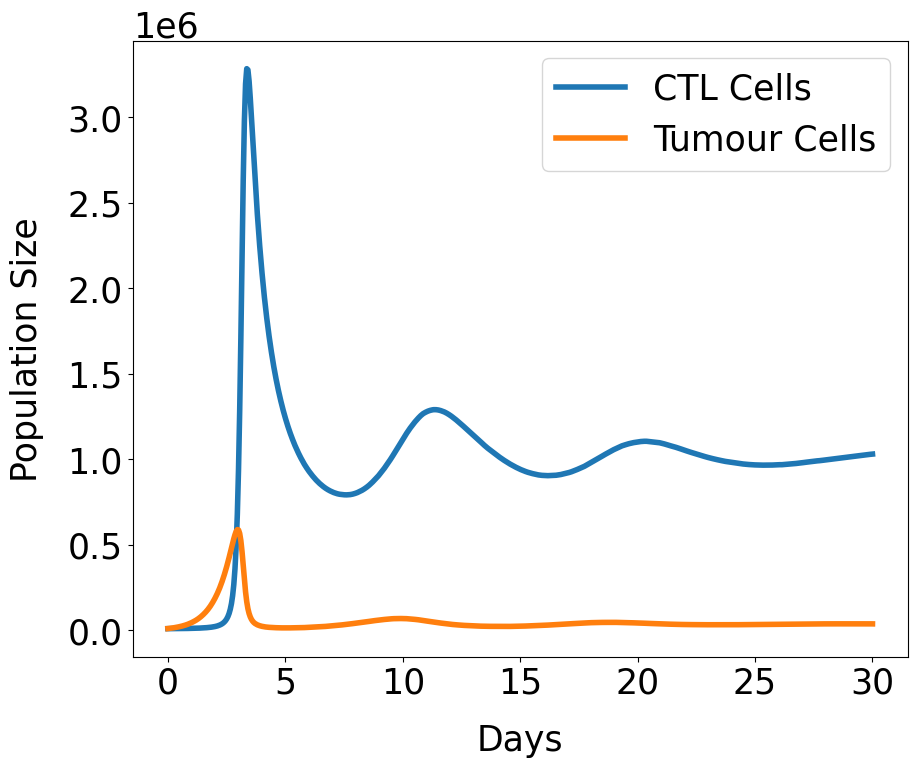

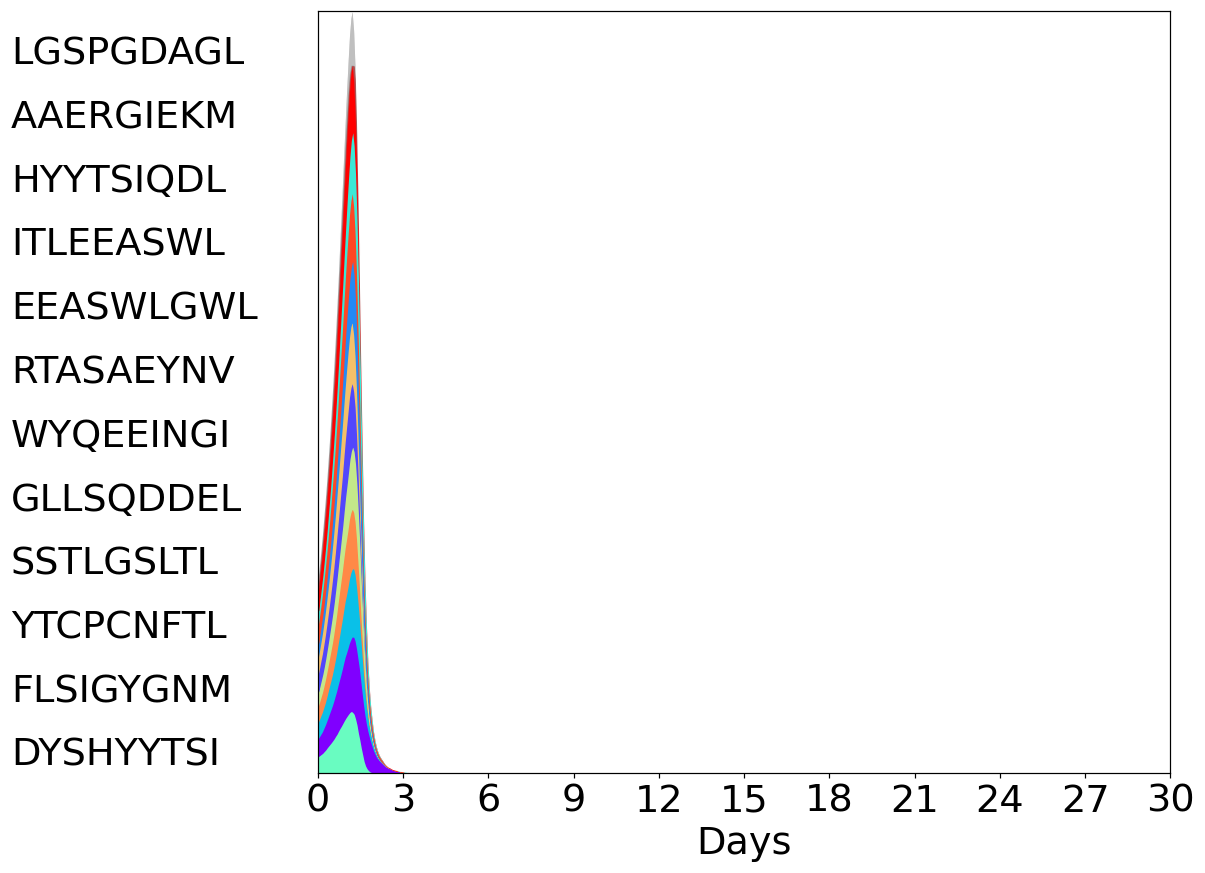

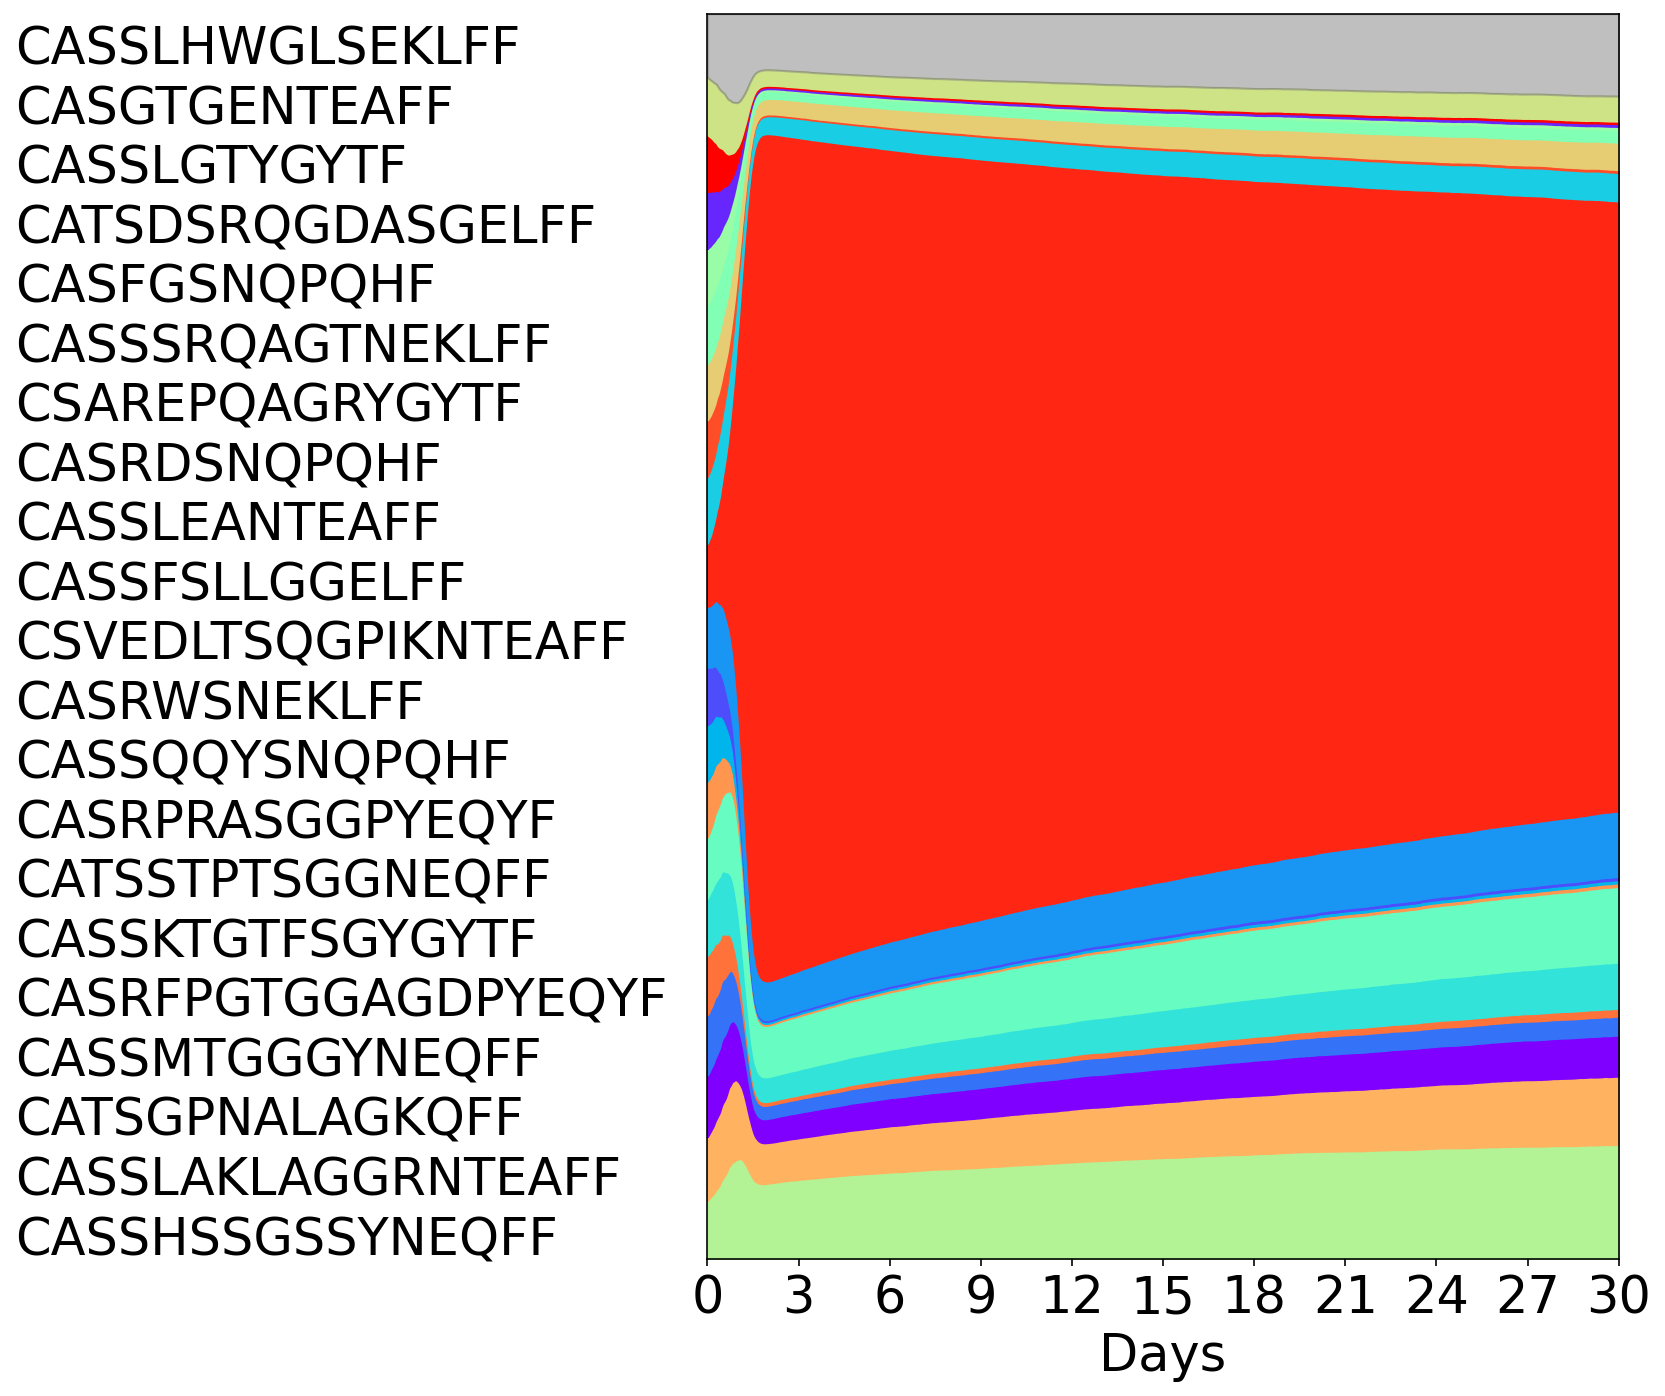

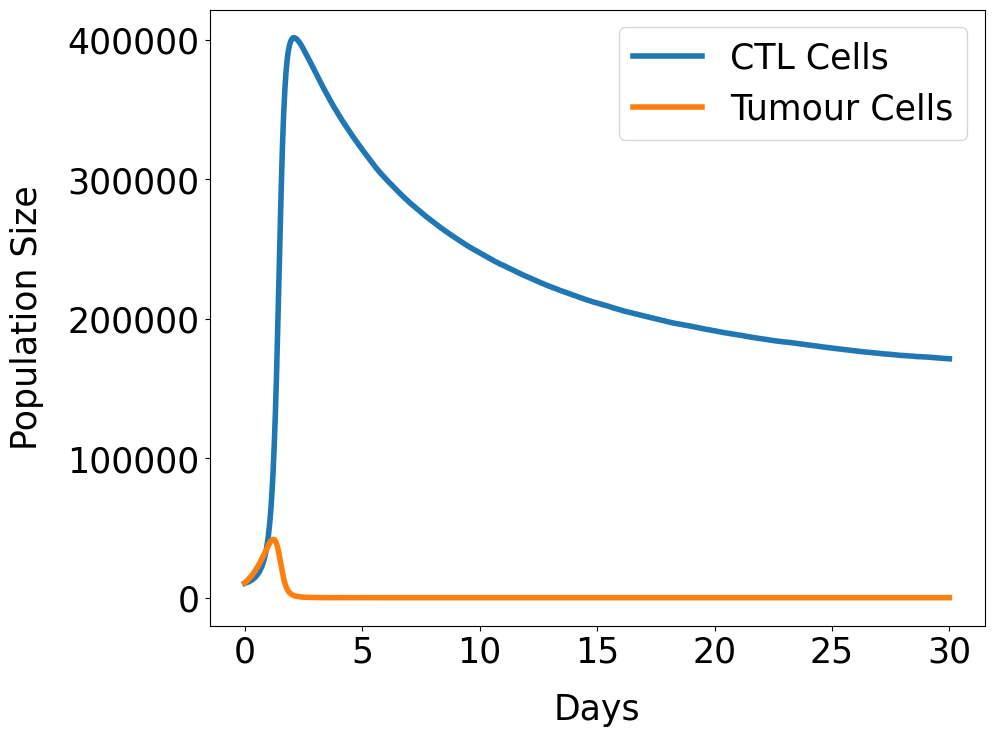

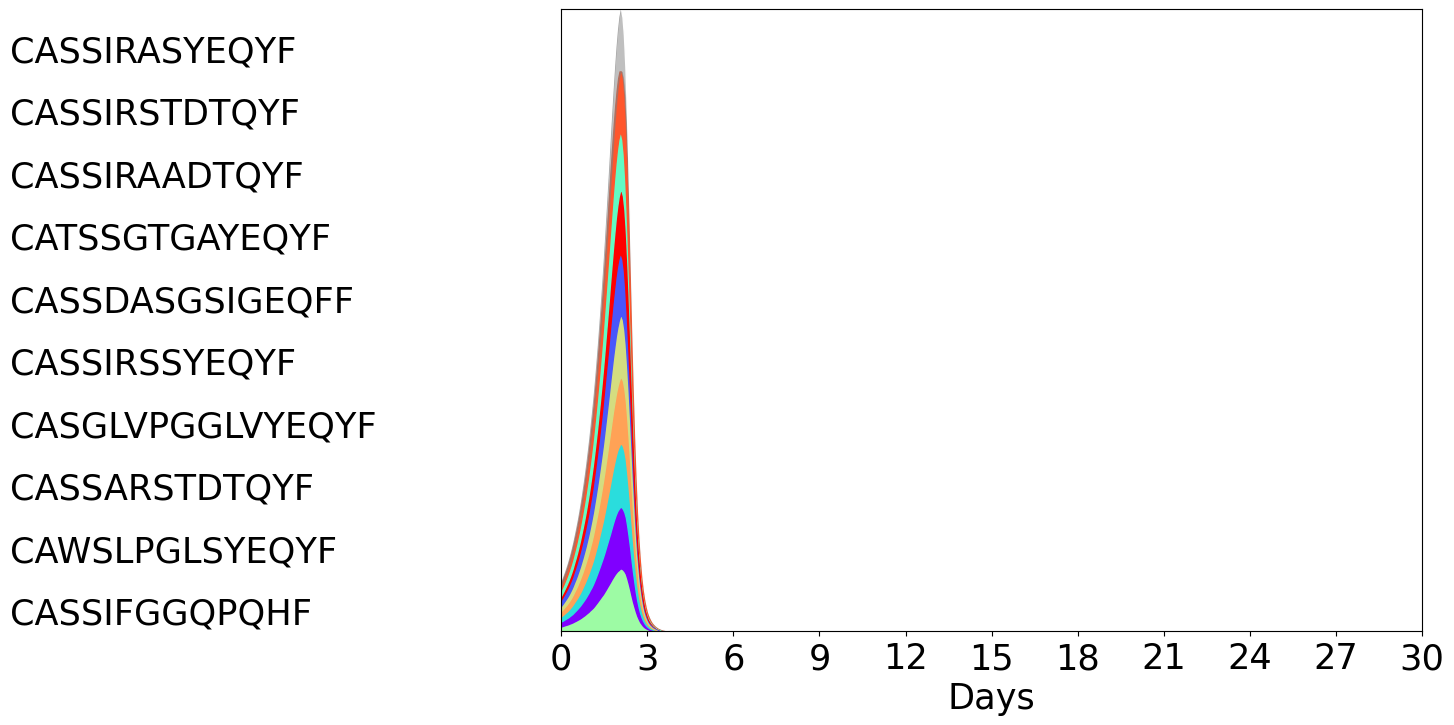

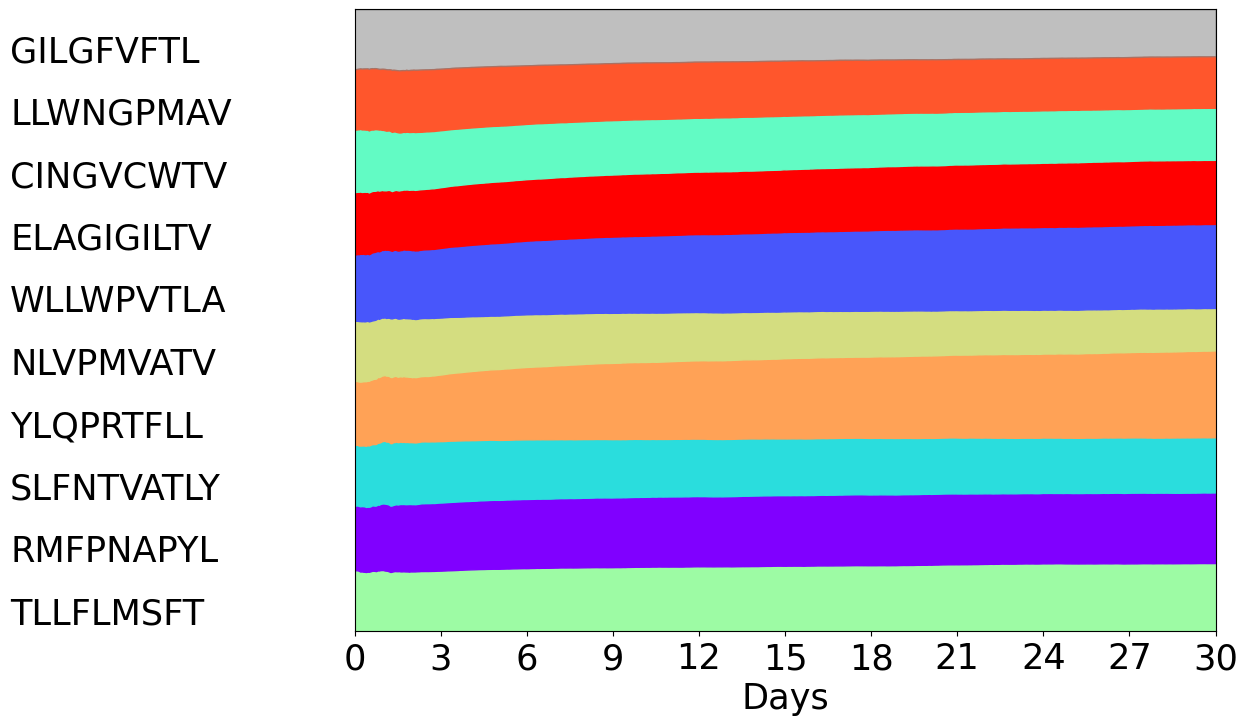

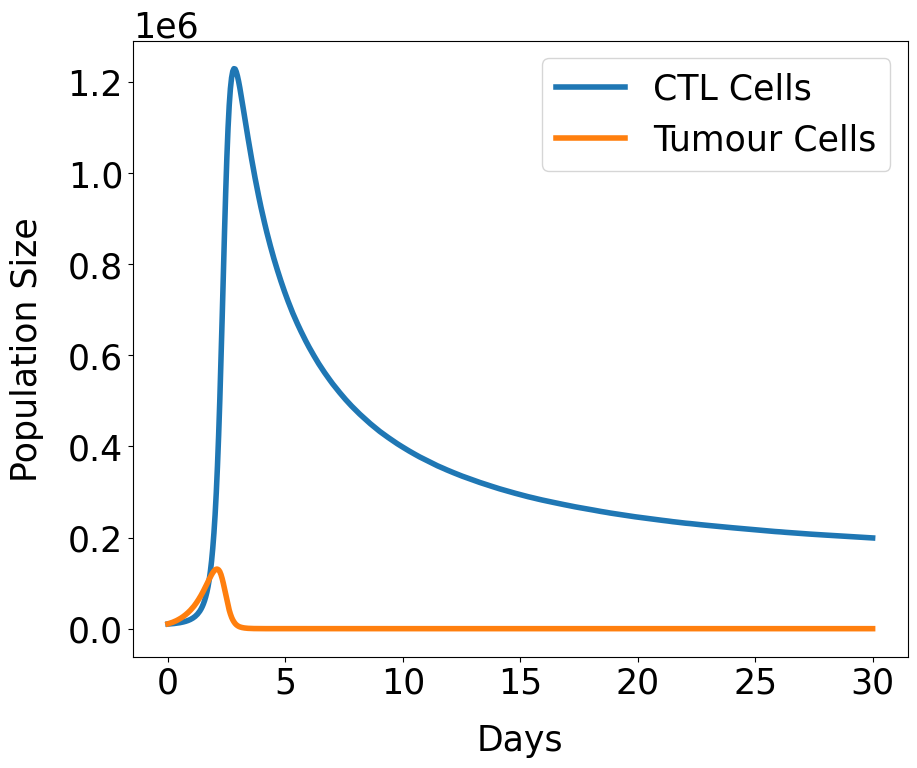

In [4]:
import os
import glob
from graphing import report_fish_tumour, get_sim, savefig_unsafe, report_fish_CTL, report_graph, report_fish_tumour_absolute

exceptions = ["../sim_data/report\sim.pickle_CorHalfRealSequenceBinding10", "../sim_data/report\sim.pickle_UnifBinding1"]

path_to_data = "../sim_data/report"
for filepath in glob.glob(os.path.join(path_to_data,"*")):
    print(filepath)
    sim = get_sim(filepath)

    if filepath in exceptions: 
        savefig_unsafe(sim, report_fish_tumour_absolute, report_path_to_output)
    else:
        savefig_unsafe(sim, report_fish_tumour, report_path_to_output)
    savefig_unsafe(sim, report_fish_CTL, report_path_to_output)
    savefig_unsafe(sim, report_graph, report_path_to_output)